# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [21]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import pylab as pl
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### Step 2: Read in your data set 

In [22]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit  gre   gpa  prestige
0      0  380  3.61         3
1      1  660  3.67         3
2      1  800  4.00         1
3      1  640  3.19         4
4      0  520  2.93         4


## Questions
#### Question 1. How many observations are in our dataset? 


In [23]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

**Answer**: It varies (i.e. most likely missing data within the dataset). See above for counts across the variables.

#### Question 2. Create a summary table

In [24]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

**Answer**: GRE has a larger STD than GPA as it's a calculation of the extent of deviation from the group and the "GRE" group has a range of 0-800 (opposed to "GPA" which has a range of 0-4)

#### Question 4. Drop data points with missing data


In [25]:
df_raw_no_missing = df_raw.dropna()
df_raw_no_missing.head()



,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

**Answer**:Just do a recount. 397 for all variables is indication that any row with missing data has been dropped.

In [26]:
df_raw_no_missing.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 6. Create box plots for GRE and GPA

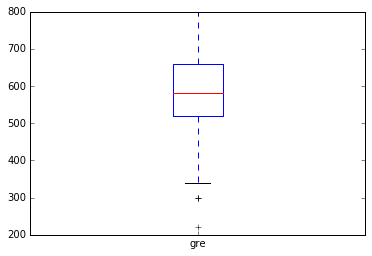

In [27]:
df_raw_no_missing.loc[:,"gre"].plot(kind='box')

In [28]:
#GRE Median
df_raw_no_missing.loc[:,"gre"].median()

580.0

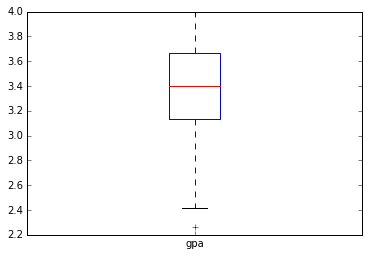

In [29]:
df_raw_no_missing.loc[:,"gpa"].plot(kind='box')

In [30]:
#GPA Median
df_raw_no_missing.loc[:,"gpa"].median()

3.4

#### Question 7. What do this plots show?

**GRE**
 - red line repsents the median = 580
 - The box represents the range between the 25% quartile and 75% quartile - in other words, 50% of all cases fall inside the box
 - The black line represents the lower bound (there is not upper bound in this case as it's 800

**GPA**
 - red line repsents the median = 3.4
 - The box represents the range between the 25% quartile and 75% quartile - in other words, 50% of all cases fall inside the box
 - The black line represents the lower bound (there is not upper bound in this case as it's 4.0



#### Question 8. Describe each distribution 

See plottin below

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c7b7510>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11db7fa50>]], dtype=object)

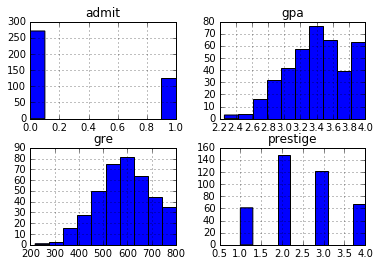

In [31]:
df_raw_no_missing.hist()

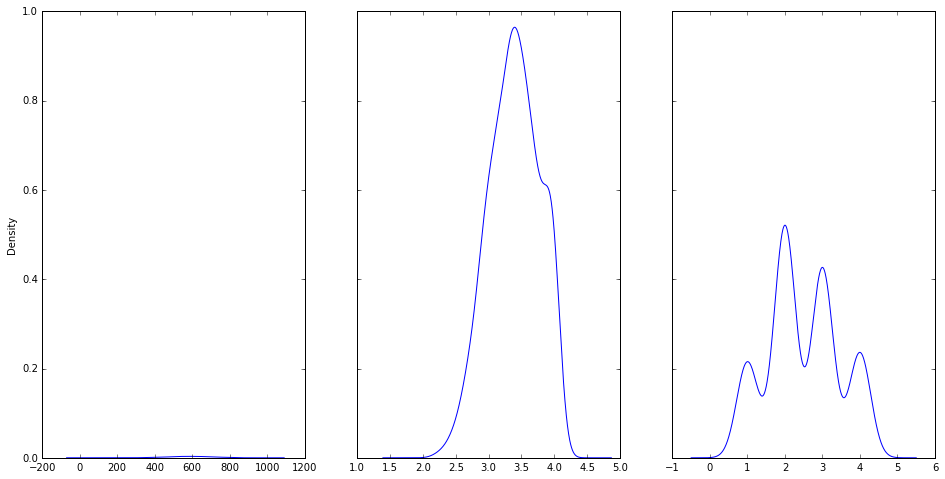

In [32]:
ig, axs = plt.subplots(1,3, sharey=True)
df_raw_no_missing['gre'].plot(kind='density', ax=axs[0], figsize=(16,8))
df_raw_no_missing['gpa'].plot(kind='density', ax=axs[1])
df_raw_no_missing['prestige'].plot(kind='density', ax=axs[2])

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

**Answer**: No, GPA is negatively skewed. 

#### Question 10.  Does this distribution need correction? If so, why? How? 

**Answer**: Yes. We need to add lower GPAs to round out the lower end of the spectrum per the historgram above. However, this data would naturally negatively skew because you'd have less low GPA student's applying to grad school.

#### Question 11. Which of our variables are potentially colinear? 

**Answer** Would consider GRE and GPA as potential colinear candidates

In [33]:
df_raw_no_missing.corr()


,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

**Answer**: There is some correlation between GRA and GPA given the #"s below. However, .38 is still extremely low when testing for colinearity and thefore there are no colinear variables.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

**Answer:**
 - Look at correlation between prestige and admit (df_raw_no_missing.corr() -> correlation = -.24)
 - Compare it to the correlation of GRE and GPA against admittance

#### Question 14. What is your hypothesis? 

**Hypothesis:** Prestige alone cannot be the only predictor of admittance as the correlation is -24. An appropriate model would most likely require all three variables: GRE, GPA and Prestige.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data